## Homework 1

**Homework assigment date:** 28 December 2022 <br>

<br> 

**Homework due date:** 11 January 2023 by 6 pm <br>


For this homework you should use a network of friendships among students living in a residence hall at Australian National University (date unknown). The data contains link directions and weighs. The direction indicates that resident $i$ named resident $j$ as a friend. The weight indicates the level of friendship: 5 (best friend), 4 (close friend), 3 (friend), 2, 1.

The dataset is within the local data folder, but you can also find it at this address: https://github.com/SaskaAloric/IntroCompleNeT2023/Homework/Homework1/data/

#### 1. Start by loading all the necesary libraries, load the data set and construct a weighted directed network.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import sys

In [2]:
edgesRD=pd.read_csv("./data/residence_hall/edges.csv")

In [3]:
edgesRD.head()

,Unnamed: 0,source,target,weight
0,0,1,2,3
1,1,1,3,4
2,2,1,4,3
3,3,1,5,3
4,4,1,6,4


In [4]:
G= nx.from_pandas_edgelist(edgesRD,
                                     source = 'source', 
                                     target = 'target', 
                                     edge_attr='weight',
                                     create_using =nx.DiGraph)

#### 2. What is number of nodes and number of edges in this network?

In [5]:
print("Number of nodes:",G.number_of_nodes())
print("Number of edges:",G.number_of_edges())

Number of nodes: 217
Number of edges: 2672


#### 3. How many of friendship edges are reciprocial?

In [6]:
over=0
for v in G.nodes():
    for u in G.nodes():
        if u>v:
            if G.has_edge(v,u) and G.has_edge(u,v):
                over+=1
print(over, G.number_of_edges())
        

833 2672


In [7]:
# another solution:

0.5*nx.reciprocity(G)*G.number_of_edges()

833.0

#### 4. What is the ID of a student considered as a friend by the most students? How many students consider that student as their friend?

In [23]:
# alternative solution
degIn=dict(G.in_degree())
maxqIn=max(degIn.values())
maxIdIn=max(degIn, key=degIn.get)
print("The ID of a person considered as a friend by the most is", maxIdIn)
print("Number of people that considere that person as a friend is", maxqIn)

The ID of a person considered as a friend by the most is 156
Number of people that considere that person as a friend is 34


In [11]:
degIn=G.in_degree()

In [12]:
maxqIn=0
maxIdIn=0
for v,q in degIn:
    if maxqIn<q:
        maxqIn=q
        maxIdIn=v
print("The ID of a person considered as a friend by the most is", maxIdIn)
print("Number of people that considere that person as a friend is", maxqIn)

The ID of a person considered as a friend by the most is 156
Number of people that considere that person as a friend is 34


#### 5. Does this student has the strongest connections with their friends?

This is the code if we use a total strength 

In [21]:
tot_str={}
for v in G.nodes():
    tot_str[v]=0
    for u in G.neighbors(v):
        tot_str[v]=tot_str[v]+G[v][u]['weight']
        if G.has_edge(u,v):
            tot_str[v]=tot_str[v]+G[u][v]['weight']

In [29]:
tot_str_s=dict(sorted(tot_str.items(), key=lambda item: item[1], reverse=True))
maxFId=list(tot_str_s.keys())[0]
if maxFId==maxIdIn:
    print("Yes")
else:
    print("No")

no


This is the code if we use average stength

In [33]:
av_str={}
for v in G.nodes():
    x=[]
    for u in G.neighbors(v):
        x.append(G[v][u]['weight'])
        if G.has_edge(u,v):
            x.append(G[u][v]['weight'])
    if len(x)>0:
        a=np.array(x)
        av_str[v]=np.mean(a)

In [34]:
av_str_s=dict(sorted(av_str.items(), key=lambda item: item[1], reverse=True))
maxFId=list(av_str_s.keys())[0]
if maxFId==maxIdIn:
    print("Yes")
else:
    print("No")

No


#### 6. What is the diameter of the strongly connected component of the network?

In [38]:
nx.is_strongly_connected(G)

False

In [39]:
n=nx.number_strongly_connected_components(G)

In [40]:
n

4

In [41]:
s=list(nx.strongly_connected_components(G))

In [42]:
for se in s:
    print(len(se))

1
214
1
1


In [43]:
H=nx.subgraph(G,s[1])

In [48]:
d=nx.diameter(H)

In [49]:
print("Diameter of the strongly connected component of the network is:", d)

Diameter of the strongly connected component of the network is: 6


#### 7. What is the average shortest path?

Average shortest paths for unweighted strongly connected component

In [51]:
l=nx.average_shortest_path_length(H)
print("Aerage shortest path is:", l)

Aerage shortest path is: 2.7599052257470054


Average shortest paths for weighted strongly connected component

In [52]:
l=nx.average_shortest_path_length(H,weight="weight")
print("Aerage shortest path is:", l)

Aerage shortest path is: 8.380610767408188


In [53]:
l=nx.average_shortest_path_length(G)
print("Aerage shortest path is:", l)

Aerage shortest path is: 2.726873186550606


Average shortest paths for weighted strongly connected component

In [54]:
l=nx.average_shortest_path_length(G,weight="weight")
print("Aerage shortest path is:", l)

Aerage shortest path is: 8.260240655401946


#### 8. Plot the distribution of betweenness and weighted betweenness centrality of the strongest connected component. <br> 
Hint: For weighted betweenness centrality you need to include wights of the links. Take a look at: http://shorturl.at/pU127

In [55]:
B=nx.betweenness_centrality(H)
Bw=nx.betweenness_centrality(H,weight="weight")
Be=nx.edge_betweenness_centrality(H)
Bwe=nx.edge_betweenness_centrality(H,weight="weight")

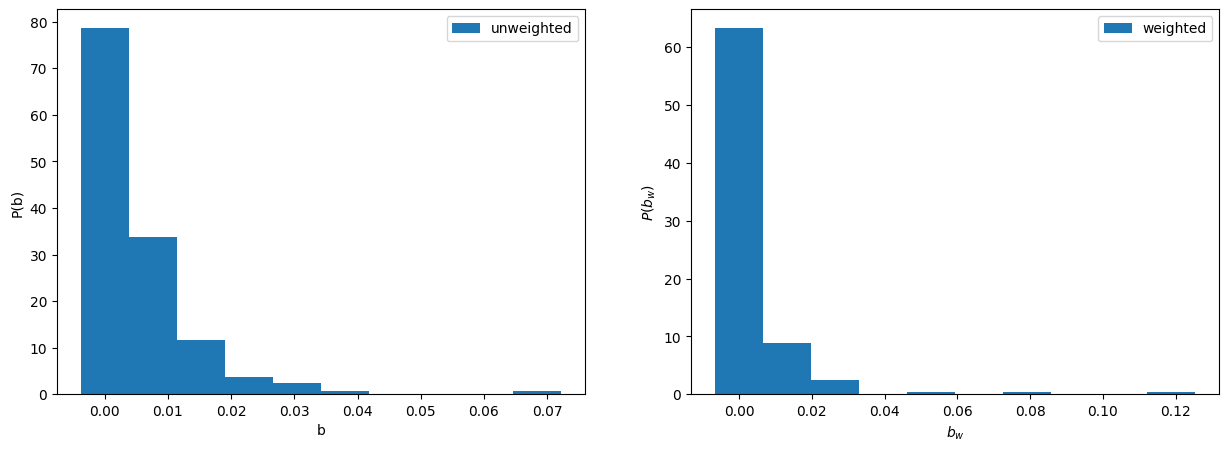

In [56]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.xlabel("b")
plt.ylabel('P(b)')
plt.hist([v for v in B.values()], bins=10, density=True, histtype='bar',align='left',label="unweighted")
plt.legend()

plt.subplot(1,2,2)
plt.xlabel(r"$b_{w}$")
plt.ylabel(r'$P(b_{w})$')
plt.hist([v for v in Bw.values()], bins=10, density=True, histtype='bar',align='left', label="weighted")
plt.legend()
plt.show()

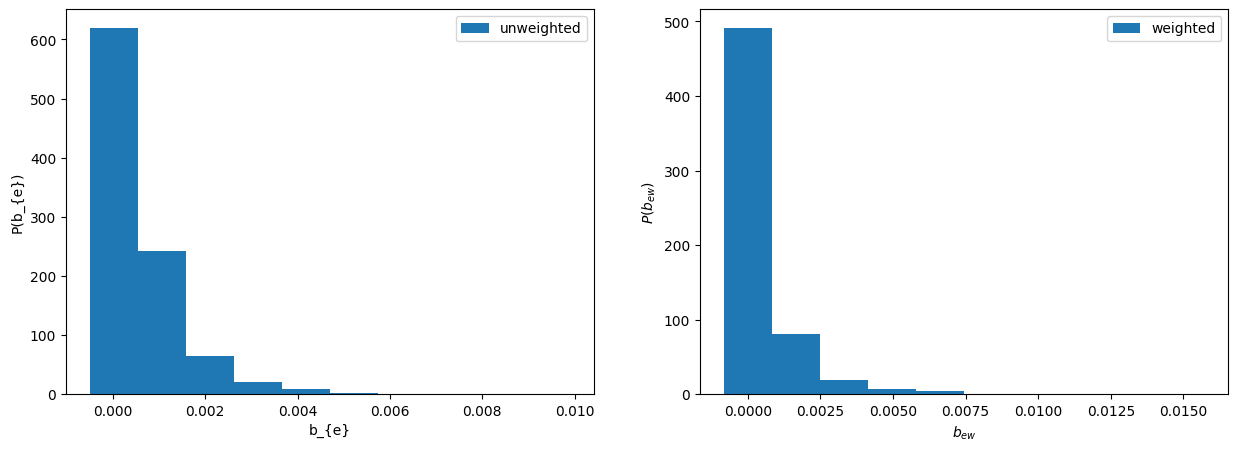

In [58]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.xlabel("b_{e}")
plt.ylabel('P(b_{e})')
plt.hist([v for v in Be.values()], bins=10, density=True, histtype='bar',align='left',label="unweighted")
plt.legend()

plt.subplot(1,2,2)
plt.xlabel(r"$b_{ew}$")
plt.ylabel(r'$P(b_{ew})$')
plt.hist([v for v in Bwe.values()], bins=10, density=True, histtype='bar',align='left', label="weighted")
plt.legend()
plt.show()

#### 9. Who is the clossest person in the community if we disregard the strength of the friendships?

In [59]:
CC=nx.closeness_centrality(H)
maxCC=0
maxCCId=0
for v in CC.keys():
    if maxCC<CC[v]:
        maxCC=CC[v]
        maxCCId=v
print("The clossest person in the community is:",maxCCId)

The clossest person in the community is: 54


#### 10. In a network we can calculate several centrality measures. Calculate pearson correlation coefficient between node in-degree centrality, out-degree centrality, unweighted betweenness centrality, and closeness centrality of the nodes in the strongest connected component. Plot it as annotated heatmap. Which are the most correlated centralities in this network?

In [60]:
CdegIn=nx.in_degree_centrality(H)
CdegOut=nx.out_degree_centrality(H)

In [61]:
a=[v for v in CdegIn.values()]
b=[v for v in CdegOut.values()]
c=[v for v in B.values()]
d=[v for v in CC.values()]
Cab=np.corrcoef(a,b)
Cac=np.corrcoef(a,c)
Cad=np.corrcoef(a,d)
Cbc=np.corrcoef(b,c)
Cbd=np.corrcoef(b,d)
Ccd=np.corrcoef(c,d)
C=np.array([[1,0,0,0],[np.around(Cab[0][1],2),1,0,0],[np.around(Cac[0][1],2),np.around(Cbc[0][1],2),1,0],[np.around(Cad[0][1],2),np.around(Cbd[0][1],2),np.around(Ccd[0][1],2),1]])

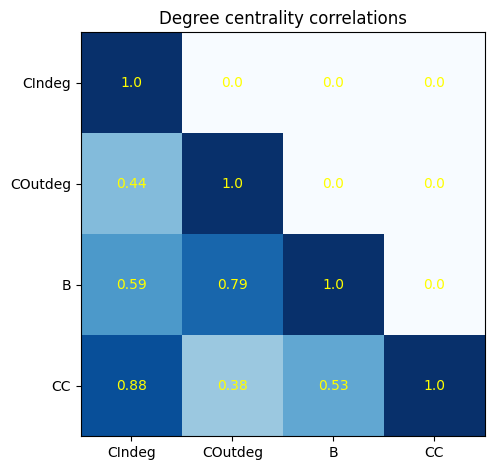

In [62]:
cm=['CIndeg','COutdeg','B','CC']
fig, ax = plt.subplots()
im = ax.imshow(C, cmap="Blues")
ax.set_xticks(np.arange(len(cm)))
ax.set_yticks(np.arange(len(cm)))
ax.set_xticklabels(cm)
ax.set_yticklabels(cm)
for i in range(len(cm)):
    for j in range(len(cm)):
        text = ax.text(j, i, C[i, j],
                       ha="center", va="center", color="Yellow")

ax.set_title("Degree centrality correlations")
fig.tight_layout()
plt.show()
#fig.savefig("centrality_correlations.png")
plt.show()